<a href="https://colab.research.google.com/github/anarossati/DIO_Python_Pandas/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dados sobre Covid-19**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#dataset
covid_data_casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
covid_data_casos

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,142414,142414,143183,143439,143439,143439,144285,145008,145552,145996,146523,146523,146523,147985,148572,148933,149361,149810,149810,149810,150778,151013,151291,151563,151770,151770,151770,152142,152243,152363,152411,152448,152448,152448,152583,152660,152722,152822,152960,152960
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310,133442,133591,133730,133912,133981,134201,134487,134761,135140,135550,135947,136147,136598,137075,137597,138132,138790,139324,139721,140521,141365,142253,143174,144079
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724,178013,179216,180356,181376,182368,183347,184191,185042,185902,186655,187258,187968,188663,189384,190078,190656,191171,191583,192089,192626,193171,193674,194186,194671
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797,14809,14836,14836,14836,14836,14873,14891,14908,14924,14924,14924,14954,14960,14976,14981,14988,14988,14988,15002,15003,15014,15016,15025,15025
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158,43269,43487,43592,43662,43747,43890,43998,44174,44328,44534,44617,44739,44972,45175,45325,45583,45817,45945,46076,46340,46539,46726,46929,47079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,65607,71144,78269,86957,94913,101173,106347,117121,123640,133405,141122,150060,157507,157507,174461,181756,189066,193381,205656,215560,224894,232937,241543,246568,255748,265464,275044,283696,293301,302101,312611,323268,336707,348059,358456,369267,381363,392938,410366,422469
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404,317534,317703,317703,317999,317999,318181,318435,319223,319646,320034,320034,321031,321031,322620,323582,324542,325404,326310,327634,329204,330821,332609,334472,335709
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096,7104,7131,7131,7165,7187,7198,7213,7233,7256,7273,7293,7308,7347,7372,7407,7454,7487,7509,7539,7580,7625,7676,7711,7751
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,

In [ ]:
#Casos na Austrália
covid_data_casos[covid_data_casos['Country/Region'] == 'Australia']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,129,131,133,152,169,191,207,219,226,245,261,291,300,314,335,361,374
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,7233,7357,7492,7651,7792,7943,8118,8294,8531,8703,8915,9153,9360,9562,9795,10063,10354,10662,10917,11201,11558,11902,12245,12629,13092,13503,13978,14416,15043,15717,16353,17173,17995,18800,19545,20466,21471,22346,23372,24585
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,191,191,191,191,192,192,192,192,197,197,197,199,200,200,198,198,198,199,199,199,199,199,199,199,199,199,200,200,200,200,200,200,200,200,200,200,200,201,201,202
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,0,1,3,2,3,2,2,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,1761,1761,1764,1763,1770,1771,1770,1790,1791,1793,1800,1809,1824,1840,1859,1886,1896,1909,1918,1923,1926,1929,1940,1948,1955,1956,1955,1957,1961,1961,1962,1964,1964,1966,1972,1972,1972,1973,1977,1977
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,840,846,850,851,855,856,856,857,859,859,859,859,862,863,866,866,866,866,866,868,868,868,868,868,868,868,868,868,868,868,869,869,869,869,870,870,870,870,870,871
13,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,1,1,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,20837,20865,20879,20891,20903,20914,20924,20932,20939,20942,20944,20948,20950,20955,20955,20961,20967,20997,21010,21021,21041,21061,21079,21098,21119,21144,21166,21191,21215,21271,21328,21389,21455,21526,21577,21618,21694,21772,21835,21926
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1046,1048,1048,1048,1048,1048,1048,1050,1051,1057,1057,1057,1058,1058,1058,1058,1058,1059,1059,1059,1059,1059,1059,1059,1059,1059,1061,1061,1061,1062,1062,1063,1063,1063,1064,1064,1084,1084,1084,1086


In [ ]:
#Retirando dados não importante para análise: Province/State, Latitude e Longitude.

covid_data_casos = covid_data_casos.drop(['Province/State', 'Lat', 'Long'], axis=1)
covid_data_casos

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,142414,142414,143183,143439,143439,143439,144285,145008,145552,145996,146523,146523,146523,147985,148572,148933,149361,149810,149810,149810,150778,151013,151291,151563,151770,151770,151770,152142,152243,152363,152411,152448,152448,152448,152583,152660,152722,152822,152960,152960
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310,133442,133591,133730,133912,133981,134201,134487,134761,135140,135550,135947,136147,136598,137075,137597,138132,138790,139324,139721,140521,141365,142253,143174,144079
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724,178013,179216,180356,181376,182368,183347,184191,185042,185902,186655,187258,187968,188663,189384,190078,190656,191171,191583,192089,192626,193171,193674,194186,194671
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797,14809,14836,14836,14836,14836,14873,14891,14908,14924,14924,14924,14954,14960,14976,14981,14988,14988,14988,15002,15003,15014,15016,15025,15025
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158,43269,43487,43592,43662,43747,43890,43998,44174,44328,44534,44617,44739,44972,45175,45325,45583,45817,45945,46076,46340,46539,46726,46929,47079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,65607,71144,78269,86957,94913,101173,106347,117121,123640,133405,141122,150060,157507,157507,174461,181756,189066,193381,205656,215560,224894,232937,241543,246568,255748,265464,275044,283696,293301,302101,312611,323268,336707,348059,358456,369267,381363,392938,410366,422469
275,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404,317534,317703,317703,317999,317999,318181,318435,319223,319646,320034,320034,321031,321031,322620,323582,324542,325404,326310,327634,329204,330821,332609,334472,335709
276,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096,7104,7131,7131,7165,7187,7198,7213,7233,7256,7273,7293,7308,7347,7372,7407,7454,7487,7509,7539,7580,7625,7676,7711,7751
277,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,187602,188573,189731,190615,191527,192071,192316,192956,193432,194140,195096,195816,196293,1

In [ ]:
#Agrupando informações Estado e País
covid_data_casos = covid_data_casos.groupby(['Country/Region']).sum()
covid_data_casos

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,142414,142414,143183,143439,143439,143439,144285,145008,145552,145996,146523,146523,146523,147985,148572,148933,149361,149810,149810,149810,150778,151013,151291,151563,151770,151770,151770,152142,152243,152363,152411,152448,152448,152448,152583,152660,152722,152822,152960,152960
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132740,132763,132797,132828,132853,132875,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310,133442,133591,133730,133912,133981,134201,134487,134761,135140,135550,135947,136147,136598,137075,137597,138132,138790,139324,139721,140521,141365,142253,143174,144079
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,155784,157005,158213,159563,160868,162155,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724,178013,179216,180356,181376,182368,183347,184191,185042,185902,186655,187258,187968,188663,189384,190078,190656,191171,191583,192089,192626,193171,193674,194186,194671
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14379,14379,14464,14498,14498,14498,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797,14809,14836,14836,14836,14836,14873,14891,14908,14924,14924,14924,14954,14960,14976,14981,14988,14988,14988,15002,15003,15014,15016,15025,15025
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41061,41227,41405,41629,41736,41780,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158,43269,43487,43592,43662,43747,43890,43998,44174,44328,44534,44617,44739,44972,45175,45325,45583,45817,45945,46076,46340,46539,46726,46929,47079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,65607,71144,78269,86957,94913,101173,106347,117121,123640,133405,141122,150060,157507,157507,174461,181756,189066,193381,205656,215560,224894,232937,241543,246568,255748,265464,275044,283696,293301,302101,312611,323268,336707,348059,358456,369267,381363,392938,410366,422469
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,315761,315876,315876,315968,315968,316088,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404,317534,317703,317703,317999,317999,318181,318435,319223,319646,320034,320034,321031,321031,322620,323582,324542,325404,326310,327634,329204,330821,332609,334472,335709
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6992,6997,7001,7003,7008,7012,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096,7104,7131,7131,7165,7187,7198,7213,7233,7256,7273,7293,7308,7347,7372,7407,7454,7487,7509,7539,7580,7625,7676,7711,7751


In [ ]:
#Selecionando 1 País: França
pd.DataFrame(covid_data_casos.loc['France'])

,France
1/22/20,0
1/23/20,0
1/24/20,2
1/25/20,3
1/26/20,3
...,...
8/24/21,6734077
8/25/21,6757783
8/26/21,6777676
8/27/21,6778133


In [ ]:
#Selecionando 2 Países: Austrália e Brasil
covid_data_casos.loc[['Australia', 'Brazil']]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,...,32266,32426,32582,32753,32918,33082,33266,33473,33726,33909,34130,34383,34612,34836,35089,35391,35698,36051,36328,36630,37010,37377,37749,38165,38658,39097,39615,40097,40774,41521,42228,43119,44026,44920,45754,46725,47840,48816,49935,51256
Brazil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,...,19419437,19473954,19523711,19632443,19670534,19688663,19707662,19749073,19797086,19839369,19880273,19917855,19938358,19953501,19985817,20026533,20066587,20108746,20151779,20165672,20177757,20212642,20245085,20285067,20319000,20350142,20364099,20378570,20416183,20457897,20494212,20528099,20556487,20570891,20583994,20614866,20645537,20676561,20703906,20728605


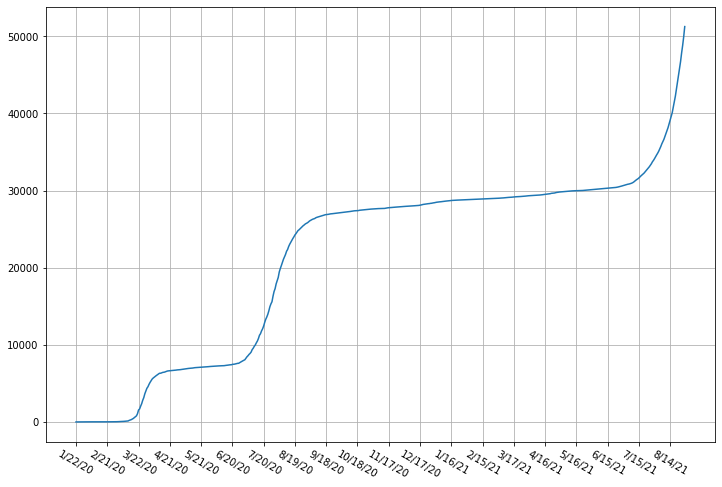

In [ ]:
#Nº de casos por dia na Austrália

fig = plt.figure(figsize=(12,8))
ax = plt.axes()


ax.plot(covid_data_casos.loc['Australia']);

ax.set_xticks(ax.get_xticks()[::30]);
ax.tick_params(axis='x', labelrotation=-30);
ax.grid();


In [ ]:
# Analisando número de mortes por Covid-19

covid_data_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
covid_data_mortes = covid_data_mortes.drop(['Province/State', 'Lat', 'Long'], axis=1)
covid_data_mortes = covid_data_mortes.groupby(['Country/Region']).sum()
covid_data_mortes

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6266,6266,6325,6357,6357,6357,6477,6515,6577,6615,6677,6677,6677,6774,6804,6836,6864,6879,6879,6879,6936,6961,6978,6988,7000,7000,7000,7025,7031,7043,7047,7054,7054,7054,7076,7083,7090,7093,7101,7101
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2456,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457,2457,2458,2459,2459,2460,2460,2460,2460,2461,2463,2464,2466,2468,2471,2473,2475,2477,2478,2478,2480,2483,2486,2487,2490
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3979,3994,4008,4026,4042,4063,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404,4441,4487,4520,4550,4578,4618,4654,4695,4730,4766,4794,4830,4867,4898,4929,4957,4984,5004,5034,5063,5096,5121,5148,5179
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,128,128,128,128,128,128,128,128,128,128,128,129,129,129,129,129,129,129,129,129,129,129,129,129,130,130,130,130,130,130
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,970,973,977,981,982,984,991,994,1000,1003,1008,1011,1016,1018,1022,1026,1032,1042,1044,1049,1053,1057,1063,1070,1082,1086,1100,1103,1118,1125,1133,1138,1140,1153,1163,1166,1176,1182,1186,1192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,334,370,370,370,370,370,524,524,630,1022,1161,1306,1306,1306,2071,2327,2720,3016,3250,3397,3757,4145,4487,4813,5088,5437,5774,6141,6472,6770,7150,7540,7540,8277,8666,9014,9349,9667,10053,10405
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3589,3591,3591,3596,3596,3599,3599,3600,3601,3601,3601,3603,3604,3609,3609,3609,3609,3611,3611,3613,3613,3615,3615,3621,3622,3623,3623,3625,3625,3627,3628,3629,3632,3637,3642,3646,3654,3657,3663,3669
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1371,1371,1372,1372,1373,1373,1373,1374,1374,1374,1375,1375,1377,1378,1380,1380,1383,1384,1384,1386,1389,1391,1392,1395,1397,1401,1403,1405,1407,1411,1414,1415,1416,1418,1420,1424,1438,1444,1447,1450


In [ ]:
# Analisando número de recuperados

covid_data_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
covid_data_recuperados = covid_data_recuperados.drop(['Province/State', 'Lat', 'Long'], axis=1)
covid_data_recuperados = covid_data_recuperados.groupby(['Country/Region']).sum()
covid_data_recuperados

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130086,130097,130109,130118,130125,130139,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107041,107776,108537,109349,109951,110577,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13930,13930,13988,13988,13988,13988,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34857,34893,35082,35284,35423,35474,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,16,16,16,16,...,11443,11971,13421,15536,17583,19342,21344,22946,27457,31780,35484,38734,43157,43157,50831,54332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,310601,310961,310961,311380,311380,311526,311526,311560,311622,311714,311772,311832,311918,312149,312289,312320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4162,4162,4162,4163,4166,4166,4166,4168,4168,4171,4171,4185,4200,4212,4232,4251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


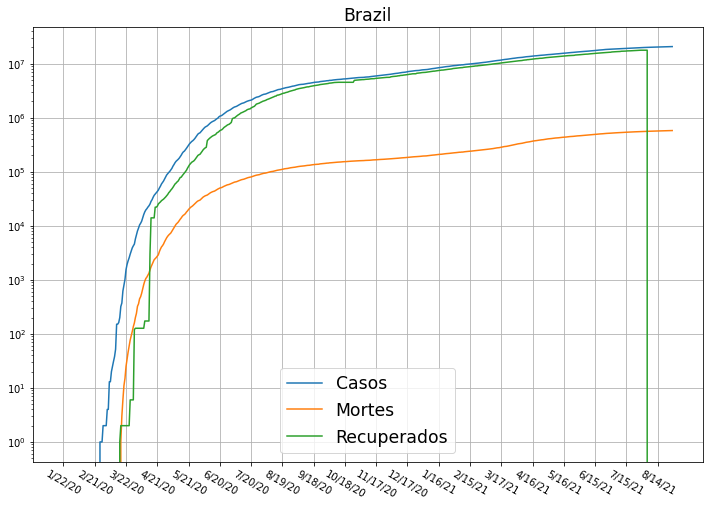

In [ ]:
# Análise nº de casos, mortes e recuperados no Brasil

pais = 'Brazil'
 
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
 
 
ax.plot(covid_data_casos.loc[pais], label='Casos')
ax.plot(covid_data_mortes.loc[pais], label='Mortes')
ax.plot(covid_data_recuperados.loc[pais], label='Recuperados')
 
ax.tick_params(axis='x', labelrotation=-30)
ax.grid()
ax.legend(fontsize='xx-large')
ax.set_title(pais, fontsize='xx-large')
plt.yscale('log')
ax.set_xticks(ax.get_xticks()[::30]);

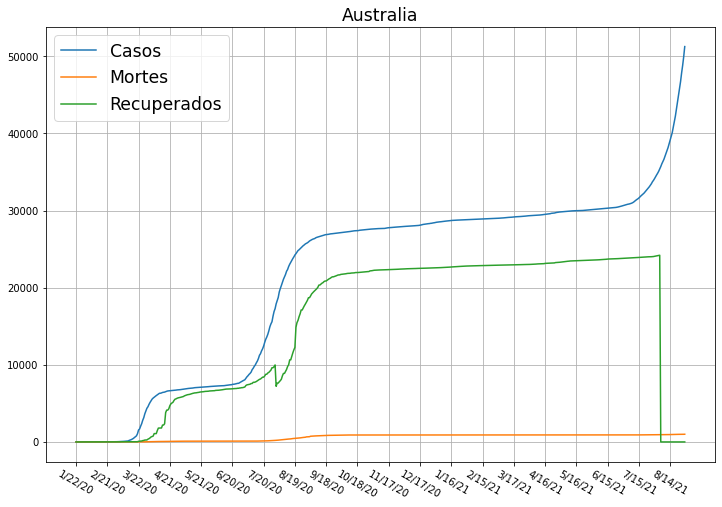

In [ ]:
# Análise nº de casos, mortes e recuperados na Austrália

pais = 'Australia'
 
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
 
 
ax.plot(covid_data_casos.loc[pais], label='Casos')
ax.plot(covid_data_mortes.loc[pais], label='Mortes')
ax.plot(covid_data_recuperados.loc[pais], label='Recuperados')
 
 
ax.tick_params(axis='x', labelrotation=-30)
ax.grid()
ax.legend(fontsize='xx-large')
ax.set_title(pais, fontsize='xx-large')
ax.set_xticks(ax.get_xticks()[::30]);

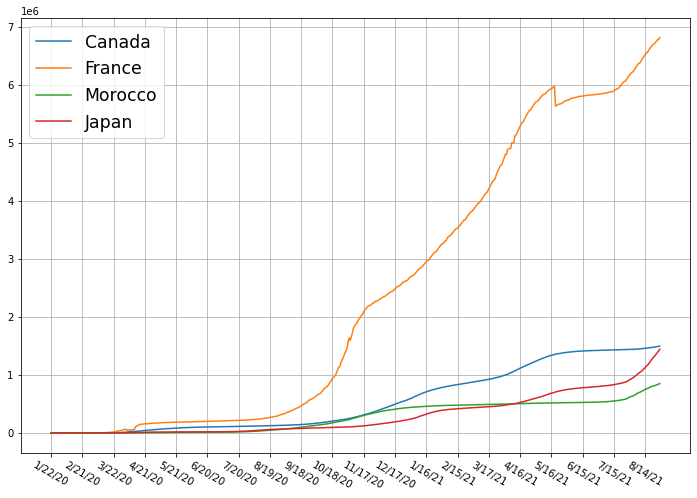

In [ ]:
#Comparando número de casos de 4 países: Canada, França, Marrocos e Japão

pais_america = 'Canada'
pais_europa = 'France'
pais_africa = 'Morocco'
pais_asia = 'Japan'
 
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
 
 
ax.plot(covid_data_casos.loc[pais_america], label=pais_america)
ax.plot(covid_data_casos.loc[pais_europa], label=pais_europa)
ax.plot(covid_data_casos.loc[pais_africa], label=pais_africa)
ax.plot(covid_data_casos.loc[pais_asia], label=pais_asia)
 
ax.tick_params(axis='x', labelrotation=-30)
ax.grid()
ax.legend(fontsize='xx-large')
# plt.yscale('log')
ax.set_xticks(ax.get_xticks()[::30]);

In [ ]:
#Estimando novos casos por semana

pais = 'Australia'

covid_data_casos_no_index = covid_data_casos.loc[pais]

covid_data_casos_no_index = covid_data_casos.loc[pais].reset_index(drop=True)

covid_data_casos_por_semana = covid_data_casos_no_index.groupby(covid_data_casos_no_index.index // 7).apply(lambda x : x.iloc[-1] - x.iloc[0])

covid_data_total_de_casos_por_semana = covid_data_casos_no_index.groupby(covid_data_casos_no_index.index // 7).last()


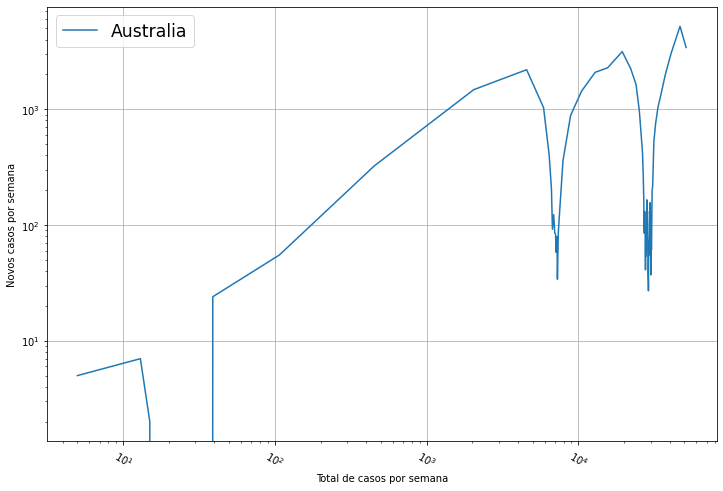

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()


plt.plot(covid_data_total_de_casos_por_semana, covid_data_casos_por_semana, label=pais)

ax.tick_params(axis='x', labelrotation=-30)
ax.grid()
ax.legend(fontsize='xx-large')

plt.xscale('log')
plt.yscale('log')

ax.set_xlabel('Total de casos por semana')
ax.set_ylabel('Novos casos por semana');